<a href="https://colab.research.google.com/github/mlacasa/1BATXILLERAT/blob/main/NumeroPi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cálculo de π por Exhaución usando Polígonos Circunscritos (Método de Arquímedes)

## 1. Base Matemática
**Objetivo**: Aproximar π usando el perímetro de polígonos regulares circunscritos en un círculo de radio 1.

Paso 1: Entender el polígono circunscrito
Un polígono regular circunscrito es aquel cuyos vértices tocan un círculo (en este caso, de radio 1). Este polígono tiene ( n ) lados iguales.

Paso 2: Calcular el ángulo central
El ángulo central subtendido por cada lado del polígono es:

$$
\theta = \frac{360^\circ}{n} \quad \text{o} \quad \theta = \frac{2\pi}{n} \quad \text{radianes}
$$

Paso 3: Calcular la longitud de un lado
Para encontrar la longitud de un lado del polígono, podemos usar la fórmula que relaciona la longitud de un lado ( L ) del polígono con el radio ( r ) del círculo (en este caso, ( r = 1 )) y el ángulo central ( $\theta$ ):

$$
L = 2r \sin\left(\frac{\theta}{2}\right)
$$

Sustituyendo ( r = 1 ):

$$
L = 2 \sin\left(\frac{\pi}{n}\right)
$$

Paso 4: Calcular el perímetro
El perímetro ( P ) del polígono se obtiene multiplicando la longitud de un lado ( L ) por el número de lados ( n ):

$$
P = n \cdot L = n \cdot 2 \sin\left(\frac{\pi}{n}\right)
$$

Resultado
Así que el perímetro de un polígono regular circunscrito de ( n ) lados y radio 1 es:

$$
P = 2n \sin\left(\frac{\pi}{n}\right)
$$

**Relación fundamental**:
- Perímetro del polígono circunscrito de $n$ lados:  
  $ P_n = 2n \cdot \sin\left(\frac{\pi}{n}\right) $
- Aproximación de π:  
  $ \pi \approx \frac{P_n}{2} = n \cdot \sin\left(\frac{\pi}{n}\right) $

---

## 2. Algoritmo Paso a Paso

### **Paso 1: Inicialización**
- Empezar con un hexágono ($n = 6$) circunscrito.
- Calcular el lado inicial usando trigonometría:  
  $ s_6 = 2 \cdot \sin\left(\frac{\pi}{6}\right) $

### **Paso 2: Fórmula Recursiva**
Para duplicar los lados ($n \to 2n$):  
$$
s_{2n} = \frac{s_n}{\sqrt{1 + \left(\frac{s_n}{2}\right)^2} + 1}
$$
*(Derivada de identidades trigonométricas para semiángulos)*

### **Paso 3: Iteración**
1. Calcular π aproximado: $ \pi_{\text{approx}} = \frac{n \cdot s_n}{2} $
2. Duplicar el número de lados: $ n = 2n $
3. Actualizar la longitud del lado usando la fórmula recursiva.

### **Paso 4: Convergencia**
Repetir hasta alcanzar la precisión deseada.

---



In [8]:
import matplotlib.pyplot as plt
import numpy as np
import math

def perimetro_poligono_regular(n):
    if n < 3:
        raise ValueError("El número de lados debe ser 3 o mayor.")
    lado = 2 * math.sin(math.pi / n)
    perimetro = n * lado
    return perimetro

def graficar_poligono(n):
    # Calcular el perímetro
    perimetro = perimetro_poligono_regular(n)

    # Calcular los ángulos de los vértices del polígono
    angulos = np.linspace(0, 2 * np.pi, n, endpoint=False)

    # Coordenadas de los vértices del polígono
    x_poligono = np.cos(angulos)
    y_poligono = np.sin(angulos)

    # Graficar la circunferencia
    x_circunferencia = np.linspace(-1, 1, 400)
    y_circunferencia = np.sqrt(1 - x_circunferencia**2)

    plt.figure(figsize=(6, 6))
    plt.plot(x_circunferencia, y_circunferencia, 'b-', label='Semicircunferencia (Radio 1)')  # Semicircunferencia
    plt.plot(x_circunferencia, -y_circunferencia, 'b-')  # Línea inferior de la circunferencia (completa)
    plt.plot(x_poligono.tolist() + [x_poligono[0]], y_poligono.tolist() + [y_poligono[0]],
             'r-', label='Polígono Regular')  # Polígono
    plt.fill(x_poligono.tolist() + [x_poligono[0]], y_poligono.tolist() + [y_poligono[0]], alpha=0.1)  # Rellenar el polígono

    # Configurar la gráfica
    plt.xlim(-1.2, 1.2)
    plt.ylim(-1.2, 1.2)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axhline(0, color='black', linewidth=0.5, ls='--')
    plt.axvline(0, color='black', linewidth=0.5, ls='--')
    plt.grid()
    plt.title(f'Polígono Regular de {n} lados Circunscrito a la Circunferencia')
    plt.legend()

    # Mostrar el perímetro y su aproximación
    aproximacion = perimetro / (2 * math.pi)
    plt.text(0, -1.1, f'Perímetro: {perimetro:.4f}\nAproximación: P/(2π) = {aproximacion:.4f}',
             fontsize=12, ha='center', va='top')

    plt.show()




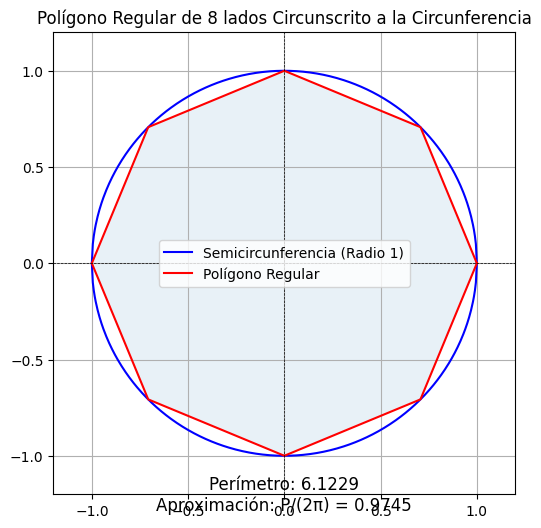

In [10]:
# Ejemplo de uso
n = 8  # Cambiar el número de lados aquí
graficar_poligono(n)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generar_poligono(n):
    # Calcular los ángulos de los vértices del polígono
    angulos = np.linspace(0, 2 * np.pi, n, endpoint=False)
    # Calcular las coordenadas (x, y) de los vértices, asegurando que están en la circunferencia de radio 1
    x = np.cos(angulos)
    y = np.sin(angulos)
    return x, y

def calcular_pi(n):
    # Calcular la longitud del polígono regular
    lado = 2 * np.sin(np.pi / n)  # Longitud de un lado
    longitud = lado * n            # Perímetro del polígono
    pi_aproximado = longitud / 2   # Aproximación para pi
    return pi_aproximado

def graficar_poligono(n):
    # Generar el polígono
    x, y = generar_poligono(n)

    # Configuración del gráfico
    plt.figure(figsize=(10, 5))

    # Graficar el círculo unitario
    theta = np.linspace(0, 2 * np.pi, 100)
    circle_x = np.cos(theta)
    circle_y = np.sin(theta)
    plt.subplot(1, 2, 1)
    plt.plot(circle_x, circle_y, 'g--', label='Círculo unitario')

    # Graficar el polígono
    plt.plot(np.append(x, x[0]), np.append(y, y[0]), 'b-', label=f'Polígono de {n} lados')  # Cerrar el polígono
    plt.fill(np.append(x, x[0]), np.append(y, y[0]), alpha=0.3)

    # Añadir detalles
    plt.xlim([-1.5, 1.5])
    plt.ylim([-1.5, 1.5])
    plt.title(f'Polígono regular de {n} lados')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()

    # Calcular y graficar la aproximación de pi
    pi_aproximado = calcular_pi(n)

    # Mostrar el valor aproximado de pi en el gráfico
    plt.text(0, 0, f'Aproximación de π: {pi_aproximado:.5f}', fontsize=12, ha='center', va='center')

    # Graficar la aproximación de π en función del número de lados
    valores = [calcular_pi(i) for i in range(3, n + 1)]  # Calcular para n lados (3 hasta n)

    plt.subplot(1, 2, 2)
    plt.plot(range(3, n + 1), valores, 'r-', marker='o', label='Aproximación de π')
    plt.axhline(y=np.pi, color='g', linestyle='--', label='Valor de π')
    plt.title('Aproximación de π')
    plt.xlabel('Número de lados')
    plt.ylabel('Aproximación de π')
    plt.legend()

    plt.tight_layout()
    plt.show()





## Ejecutar la función anterior

Indica un valor para "n" para observar el valor de pi aproximado como varía.

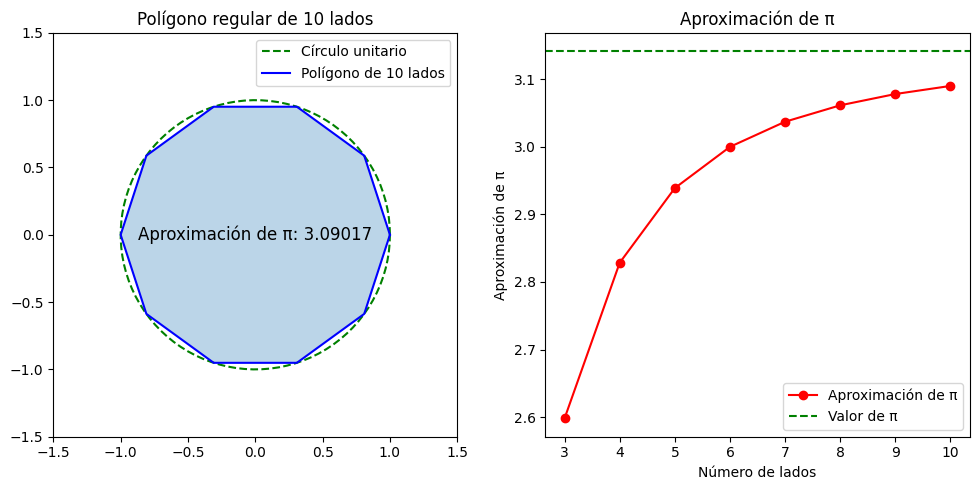

In [ ]:
# Llamada a la función
n = 10  # Puedes cambiar este valor
graficar_poligono(n)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calcular_pi(n):
    # Calcular la longitud del polígono regular
    lado = 2 * np.sin(np.pi / n)  # Longitud de un lado
    longitud = lado * n            # Perímetro del polígono
    pi_aproximado = longitud / 2   # Aproximación para pi
    return pi_aproximado

def graficar_aproximaciones(n):
    n_values = range(1, n)
    pi_aproximaciones = [calcular_pi(n) for n in n_values]

    # Graficar la aproximación de π
    plt.figure(figsize=(10, 5))
    plt.plot(n_values, pi_aproximaciones, label='Aproximación de π', color='blue', marker='o')
    plt.axhline(y=np.pi, color='green', linestyle='--', label='Valor de π')

    # Configuración del gráfico
    plt.title('Aproximación de π con Polígonos Regulares')
    plt.xlabel('Número de lados (n)')
    plt.ylabel('Aproximación de π')
    plt.xticks(np.arange(0, n, 10))
    plt.yticks(np.arange(2.5, 4, 0.1))
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()



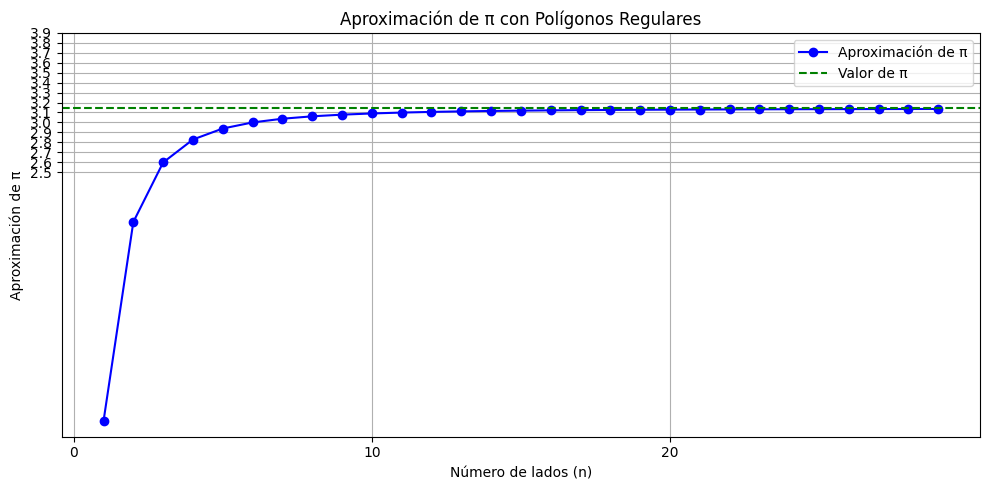

In [ ]:
# Llamada a la función para graficar por ejemplo de 1 a 30 lados
graficar_aproximaciones(30)

# Cálculo de π mediante la integral definida

La integral definida de la función que describe la parte superior del círculo unitario $ x^2 + y^2 = 1 $ se puede usar para calcular el valor de π. A continuación, se presentan los pasos para llevar a cabo este cálculo.

## 1. Comprender la Ecuación del Círculo

La ecuación del círculo unitario es:
$$ x^2 + y^2 = 1 $$

Esto significa que:
$$ y = \sqrt{1 - x^2} $$

Esta función representa la parte superior del círculo. La parte inferior se puede obtener utilizando:
$$ y = -\sqrt{1 - x^2} $$

## 2. Calcular el Área utilizando Integrales Definidas

El área $ A $ del círculo se puede calcular integrando $ y $ desde $ x = -1 $ hasta $ x = 1 $:

$$
A = \int_{-1}^{1} \sqrt{1 - x^2} \, dx
$$

Sin embargo, como la función es simétrica con respecto al eje $ y $, podemos calcular solo la mitad del área y luego multiplicar el resultado por 2:

$$
A = 2 \int_{0}^{1} \sqrt{1 - x^2} \, dx
$$

## 3. Relación con π

El área del círculo unitario también se puede expresar en términos de π:
$$ A = \pi r^2 $$
Dado que el radio $ r $ es 1, el área del círculo es:
$$ A = \pi $$

Por lo tanto, al calcular el área a través de la integral, obtenemos una aproximación de π.



Aproximación de π: 1.5707963267948961


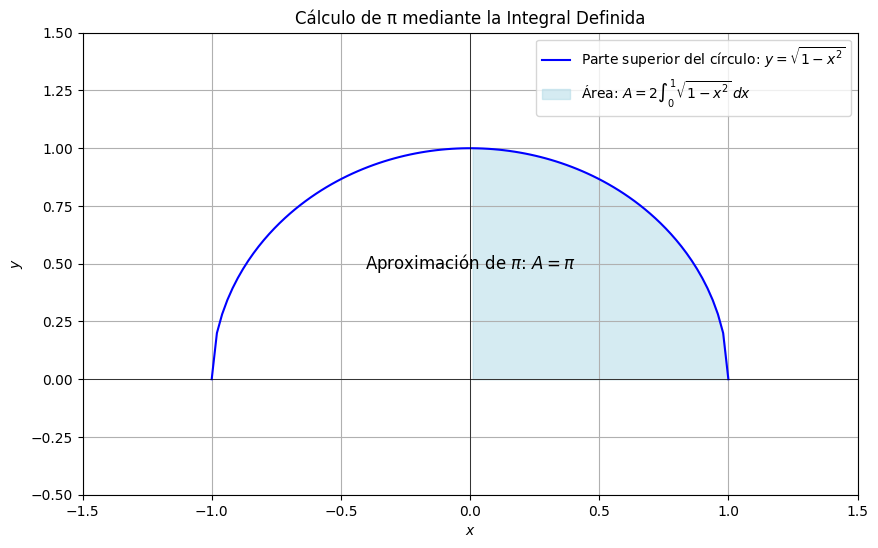

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

# Definimos la función para la parte superior del círculo
def circulo(x):
    return np.sqrt(1 - x**2)

# Calcular el área mediante la integral definida
area, error = spi.quad(circulo, 0, 1)

# Calcular el área total del círculo
area_total = 2 * area

# Crear un rango de valores para x
x = np.linspace(-1, 1, 100)
y = circulo(x)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Parte superior del círculo: $y = \sqrt{1 - x^2}$', color='blue')
plt.fill_between(x, 0, y, where=(x >= 0), color='lightblue', alpha=0.5, label='Área: $A = 2 \int_{0}^{1} \sqrt{1 - x^2} \\, dx$')

# Añadir línea horizontal y vertical
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)

# Añadir límites del gráfico
plt.xlim([-1.5, 1.5])
plt.ylim([-0.5, 1.5])

# Añadir títulos y etiquetas
plt.title('Cálculo de π mediante la Integral Definida')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()

# Indicar la relación con π en el gráfico
plt.text(0, 0.5, r'Aproximación de $\pi$: $A = \pi$', fontsize=12, ha='center', va='center', color='black')

# Mostrar el área total del círculo en la consola
print("Aproximación de π:", area_total)

# Mostrar el gráfico
plt.grid()
plt.show()

Vamos a resolver la integral definida paso a paso para el cálculo del área bajo la curva de la función del círculo $ y = \sqrt{1 - x^2} $ desde $ x = 0 $ hasta $ x = 1 $.

### Paso 1: Definir la Integral

Queremos calcular el área $ A $ de la mitad superior del círculo unitario (que tiene radio 1) entre los límites $ x = 0 $ y $ x = 1 $:

$$
A = \int_{0}^{1} \sqrt{1 - x^2} \, dx
$$

### Paso 2: Usar una Sustitución Trigonométrica

Para resolver la integral, utilizaremos la sustitución trigonométrica $ x = \sin(\theta) $. Entonces, $ dx = \cos(\theta) \, d\theta $. Al hacer esta sustitución:

- Cuando $ x = 0 $, $ \theta = 0 $.
- Cuando $ x = 1 $, $ \theta = \frac{\pi}{2} $.

Sustituyendo en la integral, tenemos:

$$
A = \int_{0}^{\frac{\pi}{2}} \sqrt{1 - \sin^2(\theta)} \cos(\theta) \, d\theta
$$

Utilizando la identidad trigonométrica $ 1 - \sin^2(\theta) = \cos^2(\theta) $, obtenemos:

$$
A = \int_{0}^{\frac{\pi}{2}} \cos^2(\theta) \, d\theta
$$

### Paso 3: Resolver la Integral de $ \cos^2(\theta) $

Utilizaremos la identidad de reducción para $ \cos^2(\theta) $:

$$
\cos^2(\theta) = \frac{1 + \cos(2\theta)}{2}
$$

Sustituyendo en la integral, se convierte en:

$$
A = \int_{0}^{\frac{\pi}{2}} \frac{1 + \cos(2\theta)}{2} \, d\theta
$$

Esto se puede separar en dos integrales:

$$
A = \frac{1}{2} \int_{0}^{\frac{\pi}{2}} 1 \, d\theta + \frac{1}{2} \int_{0}^{\frac{\pi}{2}} \cos(2\theta) \, d\theta
$$

### Paso 4: Calcular Cada Integral

1. **Integral de la constante**:

$$
\int_{0}^{\frac{\pi}{2}} 1 \, d\theta = \left[ \theta \right]_{0}^{\frac{\pi}{2}} = \frac{\pi}{2}
$$

2. **Integral de $ \cos(2\theta) $**:

$$
\int_{0}^{\frac{\pi}{2}} \cos(2\theta) \, d\theta = \left[ \frac{\sin(2\theta)}{2} \right]_{0}^{\frac{\pi}{2}} = \frac{\sin(\pi)}{2} - \frac{\sin(0)}{2} = 0
$$

### Paso 5: Sustituir de Regreso en la Ecuación de Área

Ahora podemos sustituir estos resultados en la ecuación del área:

$$
A = \frac{1}{2} \left( \frac{\pi}{2} \right) + \frac{1}{2} (0) = \frac{\pi}{4}
$$

### Paso 6: Área Total del Círculo

Como calculamos solo la mitad superior del círculo, el área total del círculo unitario $ A_{\text{total}} $ es:

$$
A_{\text{total}} = 2A = 2 \left(\frac{\pi}{4}\right) = \frac{\pi}{2}
$$

### Resultado Final

Por lo tanto, la relación entre el área del círculo unitario y π es:

$$
A = \pi \quad \text{(para el círculo unitario)}
$$

Y hemos calculado el área utilizando la integral definida. La integral ha mostrado que el área bajo la curva de la función del círculo nos da una aproximación muy clara de π.

## Nota aclaratoria sobre la identidad anterior

Paso 1: Usar la fórmula del coseno del doble ángulo
Sabemos que la fórmula del coseno del doble ángulo es:

$$
\cos(2x) = 2\cos^2(x) - 1
$$

Paso 2: Despejar $ \cos^2(x) $
A partir de la fórmula anterior, podemos despejar $ \cos^2(x) $:

$$
2\cos^2(x) = \cos(2x) + 1
$$

Dividiendo ambos lados entre 2, obtenemos:

$$
\cos^2(x) = \frac{\cos(2x) + 1}{2}
$$

Paso 3: Reescribir la ecuación
Al reordenar la expresión, escrita de manera equivalente:

$$
\cos^2(x) = \frac{1 + \cos(2x)}{2}
$$